# 연속확률분포
## 정규분포
- 평균을 중심으로 좌우대칭이고 종 모양을 갖는 확률분포 ( = 가우스분포, Gaussian distribution )

stats.norm(loc= '기대값', scale = '표준편차')

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   # FutureWarning 제거

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
font_family = 'Malgun Gothic'

sns.set(font=font_family, rc={'axes.unicode_minus' : False})

In [3]:
## 기대값이 70이고 표준편차가 10인 정규분포 생성
norm = stats.norm(loc=70, scale=10)

In [4]:
## 구간 내에 숫자를 균일한 간격으로 생성 ( X축 )
# -10 ~ 150 까지 2000개 생성
s_x = np.linspace(-10, 150, 2000)

## 확률밀도함수
s_pdf = norm.pdf(s_x)

In [5]:
## 확률밀도함수 계산
mu = 70
sigma = 10
s_pdf_cal = (1 / np.sqrt(2* np.pi * sigma**2)) * np.exp(-(s_x-mu)**2 / (2*sigma**2))

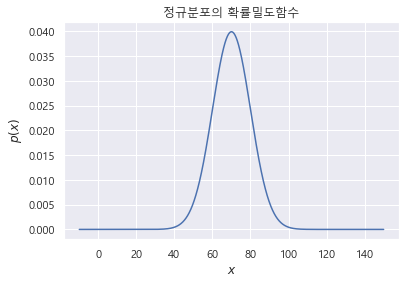

In [6]:
# 정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

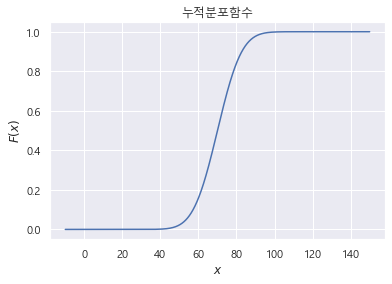

In [8]:
## 누적분포함수
s_cdf = norm.cdf(s_x)

## 누적분포함수 계산
from scipy.special import erf
s_cdf_cal = 0.5 * ( 1 + erf((s_x-mu)/(np.sqrt(2*sigma**2))))

# 누적분포함수 시각화
plt.plot(s_x, s_cdf)
plt.title('누적분포함수')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.show()

## 표준정규분포
- 표준화 확률변수 Z에 의해 변환과정을 거쳐 평균이 0이고, 표준편차가 1로 정리된 정규분포

stats.norm(loc=0, scale=1)

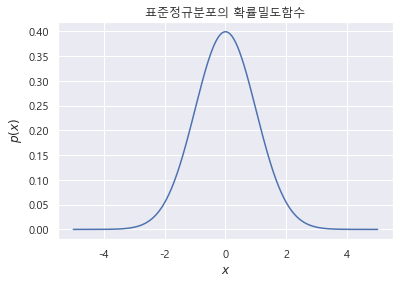

In [11]:
# 기대값이 0이고 표준편차가 11인 정규분포
stan_norm = stats.norm(loc=0, scale=1)
# 구간 내에 숫자를 균일한 간격으로 생성 ( X축 )
# -5 ~ 5 까지 1000개 생성
sn_x = np.linspace(-5, 5, 1000)

# 확률밀도함수
sn_pdf = stan_norm.pdf(sn_x)

# 정규분포 시각화
plt.plot(sn_x, sn_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

## 표준화
- 정규분포를 평균이 0이고, 표준편차가 1인 표준정규분포로 정리하는 과정

stats.norm(loc=0, scale=1)

In [22]:
## 랜덤 데이터 생성
n_data = np.random.randint(1, 100, size= 1000)
n_data = np.sort(n_data)

n_data.shape

(1000,)

In [23]:
## n_data의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print('mean:', n_mean)

n_std = np.std(n_data)
print('standard deviation:', n_std)

mean: 49.491
standard deviation: 28.44608793841431


In [24]:
## 확률밀도함수
norm_n_data = stats.norm(loc=n_mean, scale=n_std)

n_pdf = norm_n_data.pdf(n_data)

n_data.shape

(1000,)

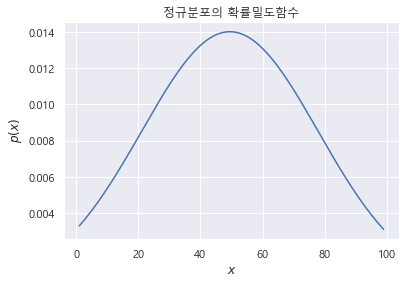

In [25]:
## 정규분포 시각화
plt.plot(n_data, n_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

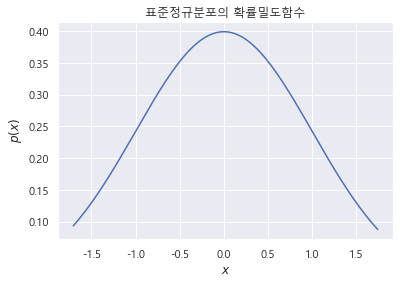

In [26]:
## 표준화 수행
z_data = list(n_data)
z_data_list = []

for i in z_data:
    z = ( i - n_mean ) / n_std
    z_data_list.append(z)
    
## 표준정규분포 확률밀도함수
norm_z_data = stats.norm(loc=0, scale=1)
z_pdf = norm_z_data.pdf(z_data_list)

# 표준정규분포 시각화
plt.plot(z_data_list, z_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

## 카이제곱분포
- 모든 데이터가 흩어진 정도, 즉 치우침을 나타내는 분산의 특징을 이용해 한 집단의 (표본)분산을 추론하는 분포
- 범주형 변수인 명목척도나 서열척도 자료의 독립성 검정, 적합성 검정, 동질성 검정에 주로 활용

chisquare() : 카이제곱 검정의 검정 통계량과 유의확률을 계산, 적합도 검정

chi2() : 카이제곱분포

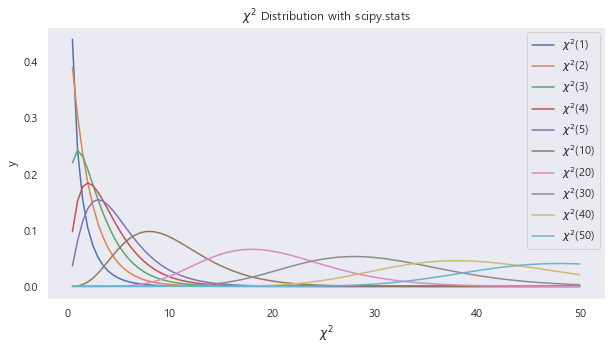

In [28]:
## 카이제곱분포 표현
from scipy.stats import chi2

## 라인스페이스 x축 설정
Chi_X = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱분포 시긱화
plt.figure(figsize=(10,5))
for dof in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]:
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
             label=r'$\chi^2$(' + str(dof) + ')')

plt.xlabel(r'$\chi^2$')
plt.ylabel('y')
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [29]:
### 카이제곱분포를 이용한 적합성 검정
## 한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매
## 교차분석표 생성 ( 자유도 2)

# 관찰도수
x_o = [324, 78, 261]
# 기대도수
x_e = [371, 80, 212]

# 지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o, x_e], columns=['서울', '인천', '대구'],
                          index=['관찰도수', '기대도수'])
                                 

In [30]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [32]:
## 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

p-value가 0.0001725로 유의수준 0.05보다 작으므로

귀무가설을 기각하고,

대립가설을 지지한다.

즉, 관찰빈도와 기대빈도는 다르다.

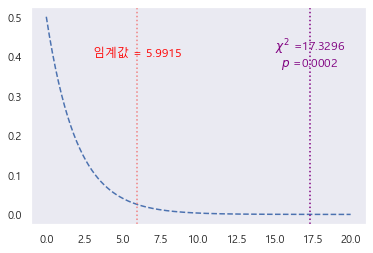

In [38]:
## 위 사례의 카이제곱분포 시각화
from scipy.stats import chi2
dof = 2   # 자유도 
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 : 5%
x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95%의 임계값 표시
plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)),
         horizontalalignment = 'center', color='red')

# 위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, r'$\chi^2$ =' + str(round(result[0], 4)), va='bottom',
        horizontalalignment = 'center', color='purple')
plt.text(result[0], .4, r'$p$ =' + str(round(result[1], 4)), va='top',
        horizontalalignment = 'center', color='purple')
plt.grid()
plt.show()
 